<a href="https://colab.research.google.com/github/ugandarsrinu/ugandarsrinu.github.io/blob/master/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import files
uploaded=files.upload()

Saving insurance.csv to insurance.csv


In [36]:
import pandas as pd

In [37]:
import io
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [40]:
df.head(5)

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

In [7]:
df.drop(['PassengerId','Title_1','Title_2','Title_3','Title_4'],axis='columns',inplace=True)

In [16]:
df.head()



Survived  Sex     Age      Fare  Pclass_1  Pclass_2  Pclass_3
0         0    1  0.2750  0.014151         0         0         1
1         1    0  0.4750  0.139136         1         0         0
2         1    0  0.3250  0.015469         0         0         1
3         1    0  0.4375  0.103644         1         0         0
4         0    1  0.4375  0.015713         0         0         1

In [13]:
df.drop(['Family_size'],axis='columns',inplace=True)

In [39]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [18]:
target=df.Survived
input=df.drop(['Survived'],axis='columns')

In [19]:
input.head()


Sex     Age      Fare  Pclass_1  Pclass_2  Pclass_3
0    1  0.2750  0.014151         0         0         1
1    0  0.4750  0.139136         1         0         0
2    0  0.3250  0.015469         0         0         1
3    0  0.4375  0.103644         1         0         0
4    1  0.4375  0.015713         0         0         1

In [22]:
input.columns[input.isna().any()]

Index([], dtype='object')

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [25]:
len(X_test)

159

In [26]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [27]:
model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
model.score(X_test,Y_test)

0.7672955974842768

In [29]:
X_test[:10]

Sex     Age      Fare  Pclass_1  Pclass_2  Pclass_3
559    0  0.4500  0.033963         0         0         1
226    1  0.2375  0.020495         0         1         0
99     1  0.4250  0.050749         0         1         0
44     0  0.2375  0.015379         0         0         1
61     0  0.4750  0.156150         1         0         0
708    0  0.2750  0.295806         1         0         0
565    1  0.3000  0.047138         0         0         1
294    1  0.3000  0.015412         0         0         1
174    1  0.7000  0.059914         1         0         0
238    1  0.2375  0.020495         0         1         0

In [30]:
Y_test[:10]

559    1
226    1
99     0
44     1
61     1
708    1
565    0
294    0
174    0
238    0
Name: Survived, dtype: int64

In [31]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [32]:
model.predict_proba(X_test[:10])

array([[6.02403439e-01, 3.97596561e-01],
       [7.81675060e-01, 2.18324940e-01],
       [8.06474828e-01, 1.93525172e-01],
       [5.51317606e-01, 4.48682394e-01],
       [1.05600894e-02, 9.89439911e-01],
       [1.14322370e-04, 9.99885678e-01],
       [9.79519731e-01, 2.04802691e-02],
       [9.79871577e-01, 2.01284231e-02],
       [5.48375514e-01, 4.51624486e-01],
       [7.81675060e-01, 2.18324940e-01]])

In [34]:
def area(base,hei):
  return 1/2*base*hei
if __name__=="__main__":
  print('hello')
  a=area(4,5)
  print(a)

hello
10.0


In [42]:
from matplotlib import pyplot as plt

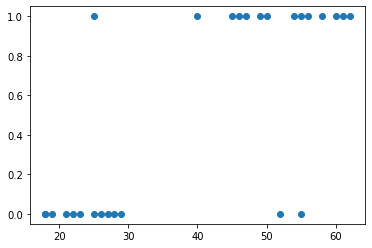

In [44]:
plt.scatter(df.age,df.bought_insurance)

In [46]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [53]:
reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
reg.score(X_test,Y_test)

1.0

In [49]:
X_test

age
20   21
12   27
16   25

In [56]:
Y_test

25    1
11    0
12    0
Name: bought_insurance, dtype: int64

In [62]:
reg.predict([[18]])

array([0])

In [57]:
reg.predict_proba(X_test)

array([[0.12230096, 0.87769904],
       [0.77635379, 0.22364621],
       [0.79709091, 0.20290909]])